In [18]:
#Dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from pycaret.nlp import *
#from pycaret.classification import *
from pycaret.regression import *
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
#df1 = pd.read_csv('data.csv')
#df = pd.read_csv('Kindle_Reviews_latest.csv')
#df1.head(3)

In [22]:
df = pd.read_csv('Kindle_Reviews_Short_JL.csv')

df.head(5)

,Unnamed: 0,overall,reviewerID,asin,reviewText,summary,vote,newReviewTime
0,0,3,A2NPZW0MXZVKPZ,B000FC2S2Q,The movie version of this book is one of my fa...,Not near as good as the movie,2,6/26/2016
1,1,5,A2JSR55IWC7HWO,B000HC48T0,"I enjoy reading this newspaper! It is real, fa...",Five Stars,7,5/4/2017
2,2,4,AR4N9QJ67IG2I,B000JMKQKS,This was very easy to read because it's writte...,Easy to read,2,11/24/2016
3,3,2,A1P00M7SDR84JY,B000JMKQKS,When I found how much I gained form the Jason ...,not as much helpful information as i had hoped...,8,10/6/2016
4,4,5,A3RZKVJ1L7XO6G,B000JMKQKS,Great book. Very informative. Would recommen...,Great book. Very informative and understandable.,2,5/11/2016


In [23]:
df.rename({'overall': 'actual_ratings'}, axis=1, inplace=True)

In [24]:
df.drop(['Unnamed: 0','asin','vote','newReviewTime'], axis=1, inplace=True)

In [25]:
df.drop(['reviewerID'], axis=1, inplace=True)

In [26]:
df.head(3)

,actual_ratings,reviewText,summary
0,3,The movie version of this book is one of my fa...,Not near as good as the movie
1,5,"I enjoy reading this newspaper! It is real, fa...",Five Stars
2,4,This was very easy to read because it's writte...,Easy to read


In [27]:
#Convert a collection of text documents to a matrix of token counts.
#implements both tokenization and occurrence counting in a single class:
tf_vectorizer = CountVectorizer(max_features=800,stop_words={'english'}, ngram_range=(1,1))

In [28]:
features = tf_vectorizer.fit_transform(df['reviewText'].apply(lambda features : np.str_(features)))

In [29]:
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [30]:
#print("Vocabulary: ", tf_vectorizer.vocabulary_)

In [31]:
features_df.head(5)

,10,able,about,absolutely,across,action,actual,actually,adam,add,...,wrong,wrote,year,years,yes,yet,you,young,your,yourself
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
3,0,0,6,0,0,0,0,1,0,0,...,0,0,0,3,0,0,5,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
new_df = pd.concat([features_df,df['actual_ratings']],axis=1)
new_df.head(5)

,10,able,about,absolutely,across,action,actual,actually,adam,add,...,wrote,year,years,yes,yet,you,young,your,yourself,actual_ratings
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,3
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,4
3,0,0,6,0,0,0,0,1,0,0,...,0,0,3,0,0,5,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [33]:
new_shuffle_df = new_df.sample(frac=1)

# Define a size for your train set 
new_train_size = int(0.75 * len(df))

# Split your dataset 
new_train_df = new_shuffle_df[:new_train_size]
new_test_df  = new_shuffle_df[new_train_size:]

In [34]:
numerical_features = list(features_df.columns)
#numerical_features

In [35]:
#the setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

exp_regr = setup(data = new_train_df, target = 'actual_ratings',numeric_features=numerical_features,session_id=123) 

,Description,Value
0,session_id,123
1,Target,actual_ratings
2,Original Data,"(3750, 801)"
3,Missing Values,False
4,Numeric Features,800
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2624, 800)"


In [36]:
compare_models() #4 min for 5k rows

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.8373,1.1046,1.0506,0.4355,0.2828,0.3755,7.1540
lightgbm,Light Gradient Boosting Machine,0.8295,1.1113,1.0536,0.4322,0.2830,0.3706,0.2600
xgboost,Extreme Gradient Boosting,0.8777,1.2619,1.1224,0.3555,0.2993,0.3907,1.7290
gbr,Gradient Boosting Regressor,0.9278,1.3023,1.1409,0.3352,0.3091,0.4315,0.8840
et,Extra Trees Regressor,0.8932,1.3026,1.1408,0.3345,0.3033,0.4012,5.7650
rf,Random Forest Regressor,0.9240,1.3354,1.1551,0.3184,0.3086,0.4228,3.6180
br,Bayesian Ridge,0.9556,1.3568,1.1642,0.3079,0.3098,0.4270,0.8730
lar,Least Angle Regression,0.9710,1.4574,1.2059,0.2564,0.3160,0.4203,0.0940
omp,Orthogonal Matching Pursuit,0.9845,1.4643,1.2093,0.2518,0.3164,0.4284,0.0400
huber,Huber Regressor,1.0388,1.7730,1.3286,0.0949,0.3367,0.4473,0.7530


In [37]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9368,1.3604,1.1663,0.3117,0.3173,0.4451
1,0.8856,1.1968,1.0940,0.3597,0.2985,0.4148
2,0.9379,1.3510,1.1623,0.3406,0.3195,0.4521
3,0.9367,1.2767,1.1299,0.3263,0.3056,0.4283
4,0.9437,1.2951,1.1380,0.3963,0.3151,0.4553
5,0.9794,1.3916,1.1797,0.2952,0.3160,0.4465
6,0.9339,1.3559,1.1644,0.3193,0.3120,0.4289
7,0.9140,1.2877,1.1348,0.3885,0.3142,0.4485
8,0.8998,1.2625,1.1236,0.3275,0.3048,0.4210


In [38]:
gbr

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
top_model = compare_models()
# 6 min for 5K rows

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.8373,1.1046,1.0506,0.4355,0.2828,0.3755,6.8420
lightgbm,Light Gradient Boosting Machine,0.8295,1.1113,1.0536,0.4322,0.2830,0.3706,0.2660
xgboost,Extreme Gradient Boosting,0.8777,1.2619,1.1224,0.3555,0.2993,0.3907,2.0240
gbr,Gradient Boosting Regressor,0.9278,1.3023,1.1409,0.3352,0.3091,0.4315,1.0650
et,Extra Trees Regressor,0.8932,1.3026,1.1408,0.3345,0.3033,0.4012,7.2610
rf,Random Forest Regressor,0.9240,1.3354,1.1551,0.3184,0.3086,0.4228,4.8990
br,Bayesian Ridge,0.9556,1.3568,1.1642,0.3079,0.3098,0.4270,1.6130
lar,Least Angle Regression,0.9710,1.4574,1.2059,0.2564,0.3160,0.4203,0.1030
omp,Orthogonal Matching Pursuit,0.9845,1.4643,1.2093,0.2518,0.3164,0.4284,0.0580
huber,Huber Regressor,1.0388,1.7730,1.3286,0.0949,0.3367,0.4473,0.9400


In [40]:
top_model

In [41]:
tuned_model = tune_model(top_model)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.8812,1.2258,1.1072,0.3798,0.2970,0.4011
1,0.8216,1.0945,1.0462,0.4143,0.2800,0.3720
2,0.9236,1.3086,1.1440,0.3613,0.3066,0.4155
3,0.8526,1.1247,1.0605,0.4066,0.2801,0.3687
4,0.8229,1.0607,1.0299,0.5056,0.2845,0.3870
5,0.8683,1.1829,1.0876,0.4009,0.2879,0.3778
6,0.8718,1.2012,1.0960,0.3969,0.2924,0.3813
7,0.8054,1.0450,1.0223,0.5038,0.2815,0.3811
8,0.8148,1.0540,1.0266,0.4386,0.2753,0.3639


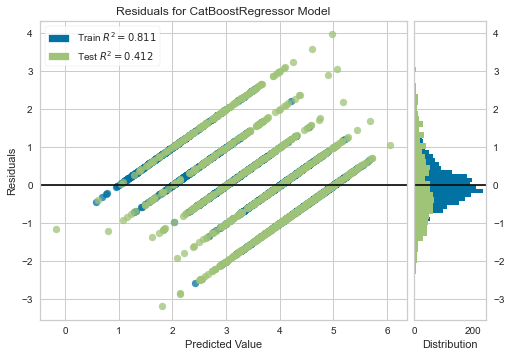

In [42]:
plot_model(tuned_model)

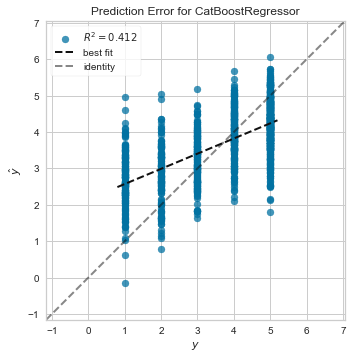

In [43]:
plot_model(tuned_model, plot = 'error')

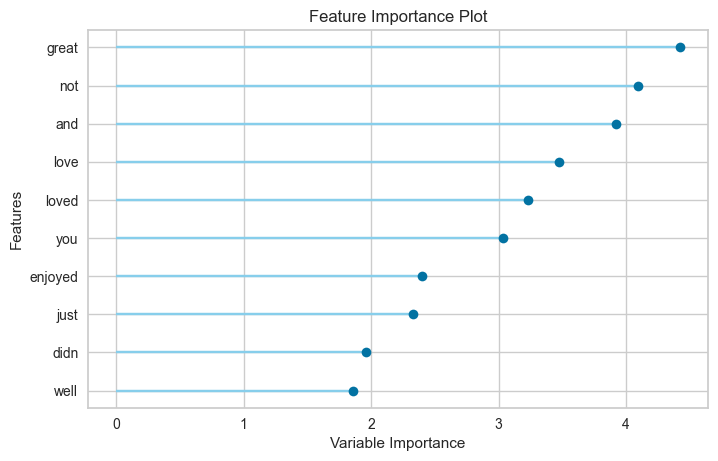

In [44]:
plot_model(tuned_model, plot='feature')

In [45]:
#evaluate_model(tuned_model);

In [46]:
predict_model(tuned_model);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.8943,1.2416,1.1143,0.4122,0.3011,0.4130


In [47]:
unseen_predictions = predict_model(tuned_model, data=new_test_df)
unseen_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.8747,1.2122,1.1010,0.3725,0.2887,0.3781


,10,able,about,absolutely,across,action,actual,actually,adam,add,...,year,years,yes,yet,you,young,your,yourself,actual_ratings,Label
2818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,2.810627
3500,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,4.986622
3457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2.009526
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,3,3.491843
487,0,0,3,0,1,1,0,0,0,0,...,0,0,0,0,2,0,0,0,5,4.375473


In [48]:
save_model(tuned_model,"deployment_review_to_ratings_04122022")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['10', 'able', 'about',
                                                           'absolutely',
                                                           'across', 'action',
                                                           'actual', 'actually',
                                                           'adam', 'add',
                                                           'adult', 'adventure',
                                                           'after', 'again',
                                                           'against', 'age',
                                                           'ago', 'all',
                              

In [84]:
model = load_model('deployment_review_to_ratings_04082022')

Transformation Pipeline and Model Successfully Loaded


In [86]:
prediction =  predict_model(model,data = new_test_df ,round =0)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,1,1,1,0,0,0


In [ ]:
cols = ['reviewText']
records = [['This book is very good']]
input_df = pd.DataFrame(data=records,columns=cols)
input_df
12:10
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())
12:10
predict_model(estimator = final_model,data=features_df)

In [87]:
cols = ['reviewText']
records = [['This book is very good']]
input_df = pd.DataFrame(data=records,columns=cols)

In [88]:
tf_vectorizer = CountVectorizer()
features = tf_vectorizer.fit_transform(input_df['reviewText'].apply(lambda features : np.str_(features)))
features_df = pd.DataFrame(features.toarray(), columns=tf_vectorizer.get_feature_names())

In [ ]:
predict_model(estimator = model,data=new_train_df)

In [122]:
columns_name = list(new_train_df.columns)

In [126]:
new_train_df.shape

(750, 801)

In [123]:
columns_name

['19th',
 '20th',
 'abagnale',
 'able',
 'about',
 'absolutely',
 'academy',
 'account',
 'action',
 'actual',
 'actually',
 'adventure',
 'after',
 'again',
 'against',
 'age',
 'ago',
 'all',
 'allison',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'amazing',
 'american',
 'amount',
 'an',
 'and',
 'anita',
 'another',
 'any',
 'anyone',
 'anything',
 'are',
 'argeneau',
 'around',
 'articles',
 'as',
 'at',
 'attention',
 'author',
 'authors',
 'available',
 'away',
 'back',
 'bad',
 'bank',
 'based',
 'battle',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'bed',
 'been',
 'before',
 'begin',
 'beginning',
 'begins',
 'behind',
 'being',
 'believe',
 'bennie',
 'best',
 'better',
 'between',
 'big',
 'birthday',
 'bit',
 'bite',
 'black',
 'bliss',
 'blood',
 'book',
 'books',
 'boring',
 'both',
 'bought',
 'bourgeoisie',
 'brennan',
 'brief',
 'bring',
 'business',
 'but',
 'buy',
 'by',
 'call',
 'came',
 'can',
 'cannot',
 'capital